In [154]:
import pandas as pd

import wandb
import Framework.Confounder_Injection as CI
import Framework.Models as Models
import importlib
importlib.reload(Models)
importlib.reload(CI)
import os
import numpy as np
import seaborn as sbs
import pandas as pd
import matplotlib.pyplot as plt

In "Validation of synthetic data" the case were the training_data was completely confounded was tested to show that neural networks indeed fit to confounding factors in images. Now the hypothesis is that if we have a small set of unconfounded data we can either use a confounder-free neural network or a DANN to unlearn the confounders. For establishing a performance baseline we need to test the SimpleConv on a dataset consisting of the confounded set and the small unconfounded set, otherwise the conditions would not be equal for the different networks.

In this case there are 512 samples from the source domain (with correlating confounders) and a varying number of samples (16 or 64) from the target domain (with no confounders).

In [155]:
model = Models.BrNet()
batch_date = "Thu Sep 29 15:20:59 CEST 2022"
batch_date = "Thu Sep 29 18:46:13 CEST 2022" # non-overlapping features
#batch_date = "Thu Sep 29 20:04:52 CEST 2022" # non-overlapping features test-drawn from source domain
filters = {
    "config.batch_date": batch_date,
    # "config.target_domain_samples": 0,
    # "summary_metrics.confounder_strength": 0,
    # "config.target_domain_confounding":0,
}
importlib.reload(CI)
# CI.wandb_sync.get_best_runs(project="Hyperparameters", filters=filters, force_reload=True)

<module 'Framework.Confounder_Injection' from '/home/raffi/Bachelor Arbeit/Jupyter/Confounder_Injection/Framework/Confounder_Injection.py'>

In [156]:
importlib.reload(CI)
table = CI.helper.BrNet_on_BrNet_data_all(batch_date=batch_date, force_reload=False, legacy=True)
table

Experiment 1.
no-confounder
0/512:
-- batch_date=Thu Sep 29 18:46:13 CEST 2022
-- test_confounding=0
-- target_domain_samples=0
-- target_domain_confounding=0
-- de_correlate_confounder_target=0
-- finetuning=0
Searching for best runs ... done (0.001s)
Re-creating models ... done (0.01s)
Runs synced, models re-created and tested (took 0.231s)

Experiment 2.
no-confounder
8/512:
-- batch_date=Thu Sep 29 18:46:13 CEST 2022
-- test_confounding=0
-- target_domain_samples=8
-- target_domain_confounding=0
-- de_correlate_confounder_target=0
-- finetuning=0
Searching for best runs ... done (0.001s)
Re-creating models ... done (0.009s)
Runs synced, models re-created and tested (took 0.283s)

Experiment 3.
de-correlated
0/512:
-- batch_date=Thu Sep 29 18:46:13 CEST 2022
-- test_confounding=1
-- target_domain_samples=0
-- target_domain_confounding=1
-- de_correlate_confounder_target=1
-- finetuning=0
Searching for best runs ... done (0.001s)
Re-creating models ... done (0.011s)
Runs synced, mode

,model,classification_accuracy,confounder_accuracy,random,experiment,summary_metrics.confounder_strength,config.target_domain_samples,config.target_domain_confounding,config.de_correlate_confounder_target,config.batch_date,config.finetuning
0,BrNet_CF-net_features_corr_conditioned_0,0.815430,0.000000,4381958957101955723,1.\nno-confounder\n0/512,0,0,0,0,Thu Sep 29 18:46:13 CEST 2022,0
1,BrNet_CF-net_features_corr,0.844727,0.000000,3892569761183247970,1.\nno-confounder\n0/512,0,0,0,0,Thu Sep 29 18:46:13 CEST 2022,0
2,BrNet_DANN_entropy,0.813477,0.000000,8775667523243148281,1.\nno-confounder\n0/512,0,0,0,0,Thu Sep 29 18:46:13 CEST 2022,0
3,BrNet,0.818359,0.000000,7146496746362303753,1.\nno-confounder\n0/512,0,0,0,0,Thu Sep 29 18:46:13 CEST 2022,0
4,BrNet_DANN_entropy_conditioned_0,0.826172,0.000000,4597737719762563669,1.\nno-confounder\n0/512,0,0,0,0,Thu Sep 29 18:46:13 CEST 2022,0
...,...,...,...,...,...,...,...,...,...,...,...
65,BrNet_DANN_entropy_conditioned_0,0.833984,0.644531,7311717500093362953,4.\nde-correlated\n64/512\nfinetuning,1,64,1,1,Thu Sep 29 18:46:13 CEST 2022,1
66,BrNet_CF-net_labels_entropy_conditioned_0,0.848633,0.524414,1632023098186424350,4.\nde-correlated\n64/512\nfinetuning,1,64,1,1,Thu Sep 29 18:46:13 CEST 2022,1
67,BrNet_CF-net_features_corr,0.842773,0.508789,1819430718532605823,4.\nde-correlated\n64/512\nfinetuning,1,64,1,1,Thu Sep 29 18:46:13 CEST 2022,1
68,BrNet_CF-net_features_corr_conditioned_0,0.846680,0.502930,9015168373801979559,4.\nde-correlated\n64/512\nfinetuning,1,64,1,1,Thu Sep 29 18:46:13 CEST 2022,1


In [157]:
def filter(df, reverse=False):
    if not reverse:
        df = df[(df["model"]=="BrNet_DANN_entropy")|(df["model"]=="BrNet")|(df["model"]=="BrNet_DANN_corr")|(df["model"]=="BrNet_CF_free_features_corr_conditioned_0.0")|(df["model"]=="BrNet_CF_free_labels_entropy_conditioned_0.0")|(df["model"]=="BrNet_CF_free_labels_entropy")|(df["model"]=="BrNet_DANN_entropy_conditioned_0.0")|(df["model"]=="BrNet_CF_free_features_corr")|(df["model"]=="BrNet_CF_free_labels_corr")]
    else:
        df = df[(df["model"]!="BrNet_DANN_entropy")&(df["model"]!="BrNet")&(df["model"]!="BrNet_DANN_corr")&(df["model"]!="BrNet_CF_free_features_corr_conditioned_0.0")&(df["model"]!="BrNet_CF_free_labels_entropy_conditioned_0.0")&(df["model"]!="BrNet_CF_free_labels_entropy")&(df["model"]!="BrNet_DANN_entropy_conditioned_0.0")&(df["model"]!="BrNet_CF_free_features_corr")&(df["model"]!="BrNet_CF_free_labels_corr")]
    return df

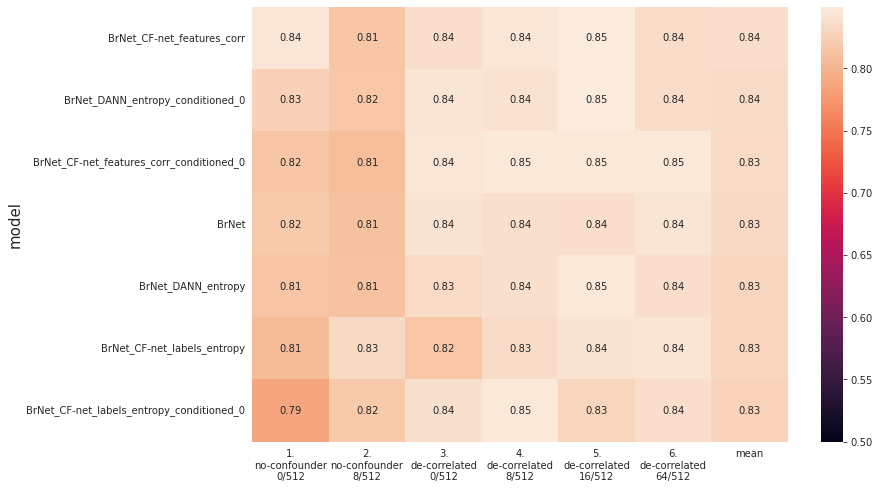

In [158]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
CI.plot.plot_heatmap_with_mean(table[table["config.finetuning"]==0], ax=ax)

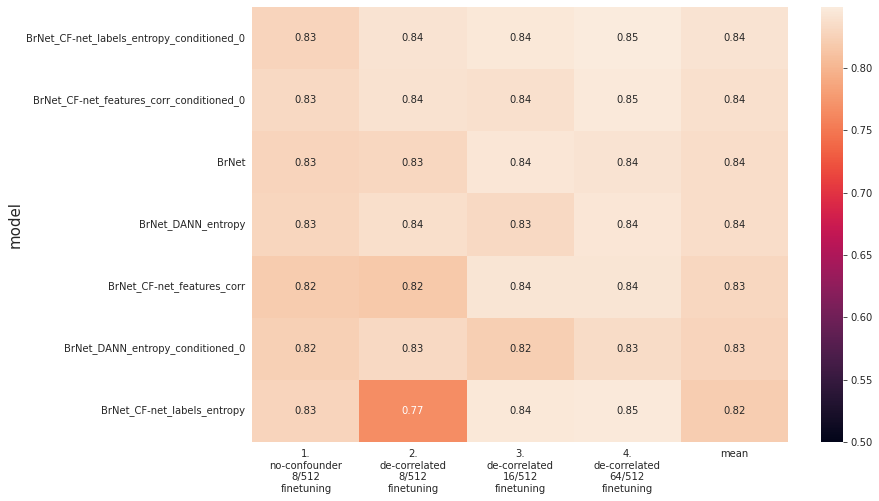

In [159]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
CI.plot.plot_heatmap_with_mean(table[table["config.finetuning"]==1], ax=ax)

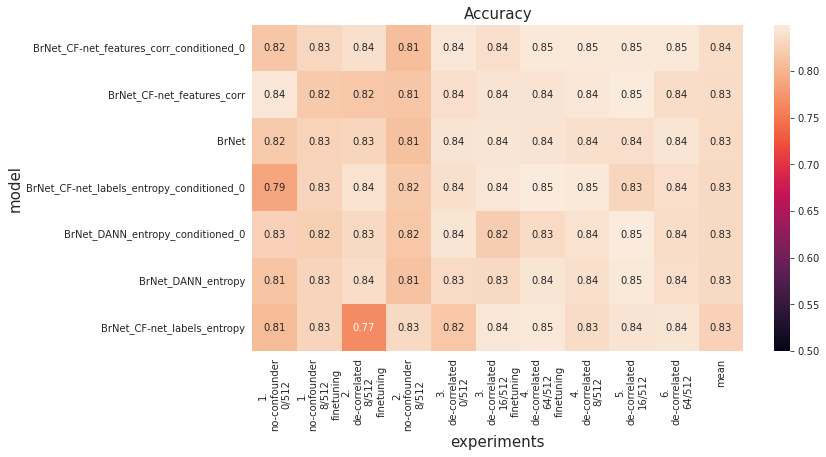

In [160]:
importlib.reload(CI)
# CI.plot.split_and_plot_heatmaps_with_mean(table)
fig, ax = plt.subplots(1,1,figsize=(11,6))
ax.set_title("Accuracy")
df = table
#df = CI.plot.filter(table, filter_unrealistic=True)
CI.plot.plot_heatmap_with_mean(df, ax=ax)
ax.set_xlabel("experiments")
pass

# No confounders in target data

### With 0 training-samples from target population

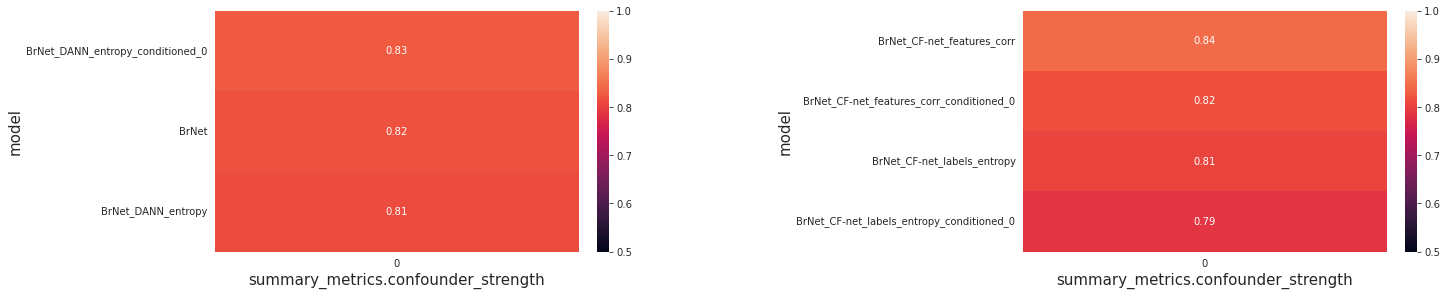

In [161]:
CI.plot.split_and_plot_heatmaps(table, target_domain_samples=0, de_correlate_confounder_target=0)

### With 16 training-samples from target population

The accuracy with more samples is the same but the network converges faster.

KeyError: 0

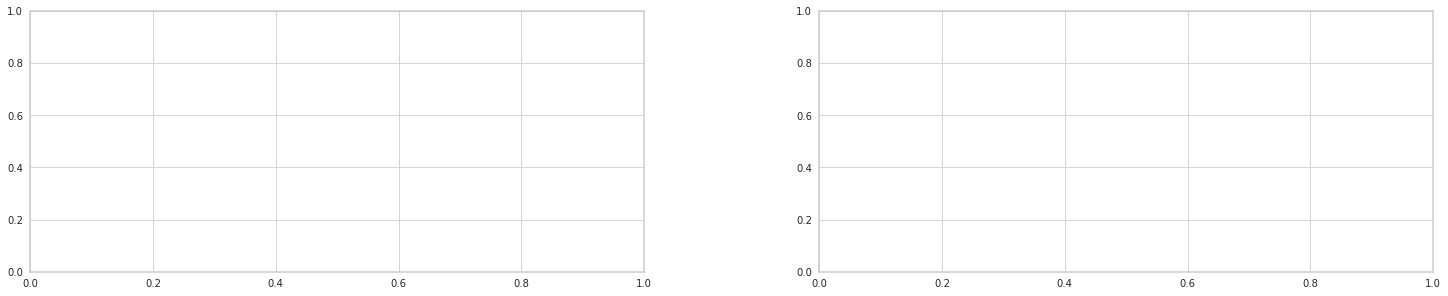

In [162]:
CI.plot.split_and_plot_heatmaps(table, target_domain_samples=16, de_correlate_confounder_target=0)

config_filter = {"confounder_strength":1, "target_domain_samples":16, "de_correlate_confounder_target": False, "batch_date": date, "target_domain_confounding":0}
p.accuracy_vs_epoch(file, config_filter, groupby="model")

# De-correlated confounders in target- and test-data

### With 0 training-samples from target population


In [ ]:
CI.plot.split_and_plot_heatmaps(table, target_domain_samples=0, de_correlate_confounder_target=1)

### With 16 training-samples from target population

In [ ]:
CI.plot.split_and_plot_heatmaps(table, target_domain_samples=16, de_correlate_confounder_target=1)

### With 64 training-samples from target population

In [ ]:
CI.plot.split_and_plot_heatmaps(table, target_domain_samples=64, de_correlate_confounder_target=1)